# Tutorial: Interactive Maps with Python and Folium

## Part 1

Referrence:

https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9

https://github.com/vincentropy/python_cartography_tutorial

### Basic Maps and Circle Markers

#### Installing folium

In your terminal,

`$ pip install --upgrade folium`

`$ pip install --upgrade pandas`

In [2]:
import pandas as pd
import folium

In [3]:
folium_map_test = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
marker = folium.CircleMarker(location=[40.738, -73.98])
marker.add_to(folium_map_test)

In [4]:
folium_map_test
# folium_map.save("my_map.html") <=== "#"でコメントアウトできます

#### Showing Some Real Data, NYC Bike Trips

Referrence:

https://www.citibikenyc.com/system-data

In [8]:
bike_data = pd.read_csv("201905-citibike-tripdata.csv")

# 一度確認してみましょう。head()はData Frameの最初の5レコードを取ってくるメソッドです
bike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [10]:
bike_data["starttime"] = pd.to_datetime(bike_data["starttime"]) # "starttime"というカラム名のデータをdatetime型に変更
bike_data["stoptime"] = pd.to_datetime(bike_data["stoptime"]) # 同上

In [11]:
# ”starttime"というカラム名のデータを時間単位で変換してその数値を"hour"というカラム名のデータとして保存
bike_data["start hour"] = bike_data["starttime"].apply(lambda x: x.hour)

In [12]:
# もう一度確認してみましょう。head()はData Frameの最初の5レコードを取ってくるメソッドです
bike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start hour
0,139,2019-05-01 00:00:01.901,2019-05-01 00:02:21.517,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1,0
1,754,2019-05-01 00:00:03.021,2019-05-01 00:12:37.692,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0,0
2,2308,2019-05-01 00:00:04.627,2019-05-01 00:38:33.171,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1,0
3,143,2019-05-01 00:00:19.334,2019-05-01 00:02:42.520,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1,0
4,138,2019-05-01 00:00:22.184,2019-05-01 00:02:40.648,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1,0


#### Net Arrivals/Departures

ここからは一つのバイクステーションから別の場所に大きな移動があるか、それはどんな時間帯に起きているかを見ていきます。

In [13]:
# 出発地のステーションIDでまとめて、その中のレコードから最初の一つをそれぞれ取ってくる
locations = bike_data.groupby("start station id").first()

# 分析したい3つのカラムを取得する
locations = locations.loc[:, ["start station latitude", "start station longitude", "start station name"]]

In [20]:
# こまめにデータを見てみる
locations.head()

,start station latitude,start station longitude,start station name
start station id,,,
72,40.767272,-73.993929,W 52 St & 11 Ave
79,40.719116,-74.006667,Franklin St & W Broadway
82,40.711174,-74.000165,St James Pl & Pearl St
83,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl
119,40.696089,-73.978034,Park Ave & St Edwards St


In [21]:
# 分析したい時間を定義する
# selected_hour = list(range(0, 24)) # 0~23をリストに入れる
selected_hour = 10

In [22]:
# selected_hourに出発したデータを取ってきてサブセットとしてまとめる
start_subset = bike_data[bike_data["start hour"] == selected_hour]
departure_counts = start_subset.groupby("start station id").count() # count()はレコード数を返すメソッド

In [23]:
# 全てのカラムに対してそのステーションIDが対応している数が出てきてしまったので( groupby（）の仕様です )、
# とりあえず最初のカラムを取ってくる
departure_counts = departure_counts.iloc[:, [0]]
# カラムを分かりやすい名称に変更する
departure_counts.columns = ["departure count"]

In [24]:
# 到着についても同様にやってみる
bike_data["stop hour"] = bike_data["stoptime"].apply(lambda x: x.hour)
stop_subset = bike_data[bike_data["stop hour"] == selected_hour]
arrival_counts = stop_subset.groupby("start station id").count()
arrival_counts = arrival_counts.iloc[:, [0]]
arrival_counts.columns = ["arrival count"]

In [25]:
# 出発と到着をData Frameとしてまとめる
trip_counts = departure_counts.join(locations).join(arrival_counts)

#### Plotting Markers for Each Station

In [26]:
# こまめにデータを見てみる( again )
trip_counts.head()

,departure count,start station latitude,start station longitude,start station name,arrival count
start station id,,,,,
72,230,40.767272,-73.993929,W 52 St & 11 Ave,229
79,124,40.719116,-74.006667,Franklin St & W Broadway,127
82,67,40.711174,-74.000165,St James Pl & Pearl St,60
83,44,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,42
119,54,40.696089,-73.978034,Park Ave & St Edwards St,62


In [27]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

trip_counts["net departures"] = trip_counts["departure count"] - trip_counts["arrival count"]
max_net_departures = max(abs(trip_counts["net departures"])) if len(trip_counts["net departures"]) > 0 else 0
max_net_departures = max_net_departures if max_net_departures != 0 else 1# 0のやつは無理矢理1にする

for index, row in trip_counts.iterrows():
    net_departures = row["net departures"]
    net_departures = net_departures / 2
    radius = abs(net_departures) # 純出発or到着数が多いほど円が大きくなるように半径を設定しておく
    
    popup_text = """{}<br>
                    total departures: {}<br> 
                    total arrivals: {}<br>
                    net departures: {}"""
    popup_text = popup_text.format(row["start station name"],
                                   row["arrival count"],
                                   row["departure count"],
                                   net_departures)
    
    if net_departures > 0:
        color="#E37222" # オレンジ
    else:
        color="#0A8A9F" # ティール
    
    folium.CircleMarker(location=(row["start station latitude"], row["start station longitude"]),
                                                        radius=radius,
                                                        color=color,
                                                        fill=True,
                                                        popup=popup_text
                                       ).add_to(folium_map) # 最初に定義しているfolium_mapというオブジェクトにデータを加える

In [28]:
folium_map

In [200]:
# folium_map.save("./mapping_sample_"+str(selected_hour)+".html")

## Part 2

In your terminal,

`$ pip install Pillow`

`$ npm install colorsys`

In [297]:
from PIL import Image, ImageDraw
from scipy import ndimage
from colorsys import hsv_to_rgb, rgb_to_hsv
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [298]:
def add_lines(image_array, xys, width=1, weights=None):
    """
    Add a set of lines (xys) to an existing image_array
    width: width of lines
    weights: [], optional list of multipliers for lines. 
    """
    
    for i, xy in enumerate(xys):  # loop over lines
        # create a new gray scale image
        image = Image.new("L",(image_array.shape[1], image_array.shape[0]))
        
        # draw the line
        ImageDraw.Draw(image).line(xy, 200, width=width)
        
        #convert to array
        new_image_array = np.asarray(image, dtype=np.uint8).astype(float)
        
        # apply weights if provided
        if weights is not None:
            new_image_array *= weights[i]
            
        # add to existing array
        image_array += new_image_array

    # convolve image
    new_image_array = scipy.ndimage.filters.convolve(image_array, get_kernel(width*4)) 
    return new_image_array

In [299]:
def get_kernel(kernel_size, blur=1/20, halo=.001):
    """
    (n*2+1)x(n*2+1)のnumpy配列を作る
    """
    
    # generate x and y grids
    x, y = np.mgrid[0:kernel_size*2+1, 0:kernel_size*2+1]
    
    center = kernel_size + 1  # center pixel
    r = np.sqrt((x - center)**2 + (y - center)**2)  # distance from center
    
    # now compute the kernel. This function is a bit arbitrary. 
    # adjust this to get the effect you want.
    kernel = np.exp(-r/kernel_size/blur) + (1 - r/r[center,0]).clip(0)*halo
    return kernel

In [347]:
def to_image(array, hue=.62):
    """
    RGB形式に変更する
    """
    
    # apply saturation function
    image_data = np.log(array + 1)
    
    # create colormap, change these values to adjust to look of your plot
    saturation_values = [[0, 0], [1, .68], [.78, .87], [0, 1]]
    colors = [hsv_to_rgb(hue, x, y) for x, y in saturation_values]
    cmap = LinearSegmentedColormap.from_list("my_colormap", colors)
    
    # apply colormap
    out = cmap(image_data/image_data.max())
    
    # convert to 8-bit unsigned integer
    out = (out*255).astype(np.uint8)
    return out

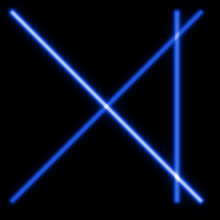

In [348]:
# generate some lines
xys = [(10,10,200,200), (175,10,175,200), (200,10,10,200)]  
weights = np.array([2,1,.7])/100  # some weights

# create the image_data
new_image_data = add_lines(np.zeros((220,220)),
                           xys,
                           width=4,
                           weights=weights)

# show the image
Image.fromarray(to_image(new_image_data),mode="RGBA")

In [349]:
min_lat = bike_data["start station latitude"].min()
max_lat = bike_data["start station latitude"].max()
max_lon = bike_data["start station longitude"].max()
min_lon = bike_data["start station longitude"].min()

def latlon_to_pixel(lat, lon, image_shape):
    # longitude to pixel conversion (fit data to image)
    delta_x = image_shape[1]/(max_lon-min_lon)
    
    # latitude to pixel conversion (maintain aspect ratio)
    delta_y = delta_x/np.cos(lat/360*np.pi*2)
    pixel_y = (max_lat-lat)*delta_y
    pixel_x = (lon-min_lon)*delta_x
    return (pixel_y,pixel_x)

In [350]:
def row_to_pixel(row,image_shape):
    """
    行データをピクセルの組み合わせ(線)にする
    """
    start_y, start_x = latlon_to_pixel(row["start station latitude"], 
                                       row["start station longitude"], image_shape)
    end_y, end_x = latlon_to_pixel(row["end station latitude"], 
                                   row["end station longitude"], image_shape)
    xy = (start_x, start_y, end_x, end_y)
    return xy

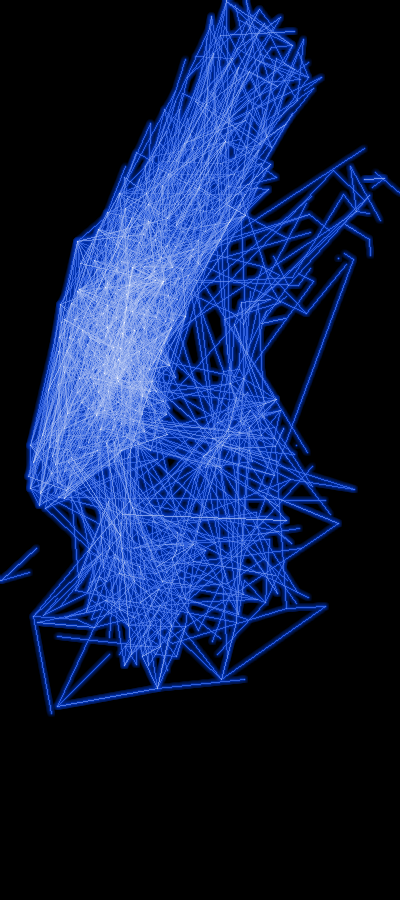

In [405]:
paths = bike_data[bike_data.hour==10]
paths = paths.iloc[:3000,:]
# generate empty pixel array, choose your resolution
image_data = np.zeros((900,400))
# generate pixel coordinates of starting points and end points
xys = [row_to_pixel(row, image_data.shape) for i, row in paths.iterrows()]
# draw the lines
image_data = add_lines(image_data, xys, weights=None, width = 1)
Image.fromarray(to_image(image_data*10)[:,:,:3],mode="RGB")